In [1]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer involves stopwords removal hence we dont need to import it explicitly 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
#We apply stemming as our final preprocessing step to our word vector




In [2]:
df = pd.read_csv("/Users/debdeepsanyal/Downloads/WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


We observe that we have null values in our dataset.

The _**Unnamed :0**_ column is'nt useful for classification, hence we'll drop the column.

In [4]:
df = df.drop('Unnamed: 0', axis  = 1)

<Axes: >

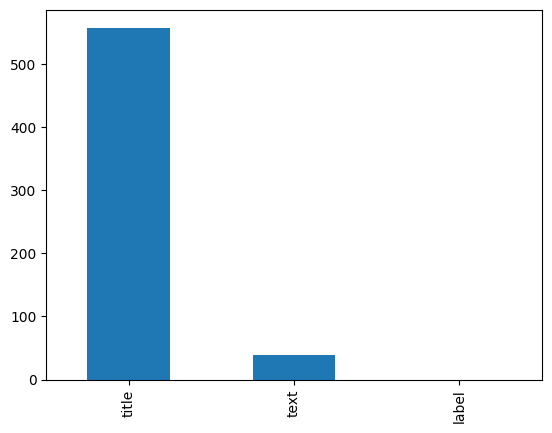

In [5]:
df.isnull().sum().plot(kind='bar')

In [6]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

We observe that we have a lot of _null_ values in our data. Since this is text data, we just have to impute the values with blanks.

In [7]:
df = df.fillna(' ')
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

All the null titles and texts have been imputed with a blank space.

We create a new feature named _**title_text**_, which contains the concatenated title and text as a single piece of text.

Another feature named _**body_len**_ has been created which is a mere count of the characters in the text (not the spaces). The purpose behind the creation of this feature is to observe any differences between the size of fake and real news.

In [8]:
df["title_text"] = df["title"] + df['text']
df['body_len'] = df['title_text'].apply(lambda x : len(x) - x.count(' '))
df.head(10)

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,152
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,68
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,Sports Bar Owner Bans NFL Games…Will Show Only...,1268
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,Latest Pipeline Leak Underscores Dangers Of Da...,2593


In [9]:
print(max(df['body_len']))
print(min(df['body_len']))

122556
1


In [10]:
store = df[df['label']==0]['body_len']
print(np.mean(store))

2965.5684309695102


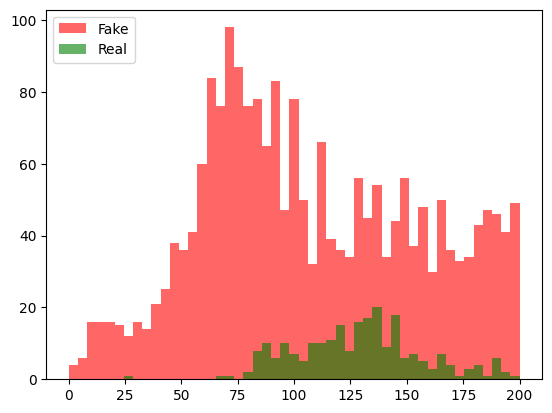

In [11]:
bins= np.linspace(0,200, 50)

plt.hist(df[df['label']==1]['body_len'], bins, alpha=0.6, label = 'Fake', color='red')
plt.hist(df[df['label']==0]['body_len'], bins, alpha=0.6, label = 'Real', color = 'green')
plt.legend(loc = 'upper left')
#plt.xscale('log')


a significant difference is observed in the distribution of fake and real news, which makes this new feature a useful one for classification.

In [12]:
x = df['title_text']
y = df['label']

In [13]:
type(x)

pandas.core.series.Series

Now, we need to transform the text documents to vectors. We will be using **TfidfVectorizer** for it. We are eliminating the stop words using the *stop_words* parameter, and for making the model more robust, we are training on unigram and bi-gram vectors. This increases the dimensionality of the data but we expect a better, more robust model.

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
x = tfidf_vectorizer.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

We'll adopting the **StratifiedKFold** method for cross validating our data. This will help us look out for bias/variance in our model or any sort of discrepancy in the train/test sets.

In [16]:
cv = StratifiedKFold(shuffle=True, random_state=1)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
nb = MultinomialNB()
rf = RandomForestClassifier(n_jobs=-1)

cv_scores = cross_val_score(nb, x_train, y_train, cv = cv, n_jobs= -1)

cv_scores

array([0.89932421, 0.89637844, 0.89143055, 0.89446322, 0.90434104])

## Naive Bayes

In [18]:
cv_scores = cross_val_score(nb, x_train, y_train, cv = cv, n_jobs= -1)

cv_scores

array([0.89932421, 0.89637844, 0.89143055, 0.89446322, 0.90434104])

For _**Naive Bayes**_, the cross validation are scores are comparable (and pretty decent) across all the five folds. This ensures that the model is performing well on the dev set.

## Random Forests

In [19]:
cv_scores = cross_val_score(rf, x_train, y_train, cv = cv, n_jobs= 4)

cv_scores 

array([0.92834864, 0.92834864, 0.92539641, 0.93024868, 0.92903561])

_Random Forests_ took **6 hours** to train, as compared to the _Naive Bayes_ model which took **less than 3 seconds**. The leap in performance between the two models is'nt quantum, and one has to judge for the time - performace tradeoff.

In [20]:
nb.fit(x_train, y_train)
predicted = nb.predict(x_test)
score = nb.score(x_test, y_test)
score

0.9016427531711374

In [21]:
classes = ['Fake', 'Real']

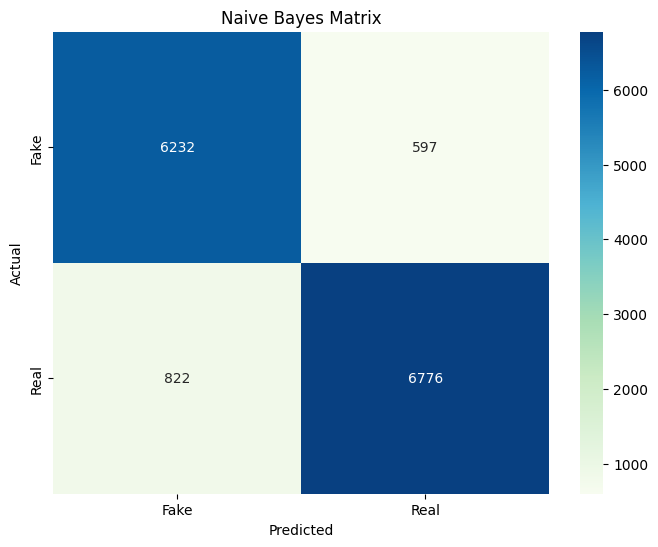

In [22]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('Naive Bayes Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6829
           1       0.92      0.89      0.91      7598

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



We get a fairly decent model with _Naive Bayes_, with an average **F1-score** of 90%.

In [24]:
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
score = rf.score(x_test, y_test)
score

0.934289873154502

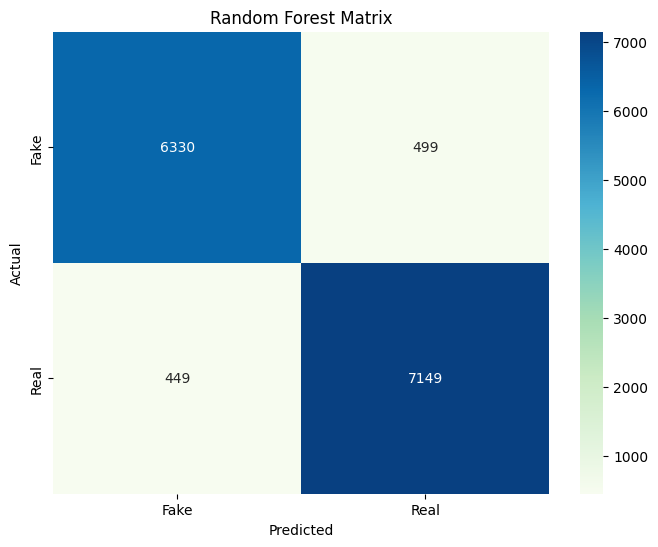

In [25]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('Random Forest Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6829
           1       0.93      0.94      0.94      7598

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



Although the average F1-score of the Random Forest Classifier is higher than the Naive Bayes model (a difference of 3%), we don't get to observe a huge leap.

In [27]:
score = pd.DataFrame({'Model' : ['Naive Bayes', "Random Forest Classifier"], 'Score' : 0})
score

,Model,Score
0,Naive Bayes,0
1,Random Forest Classifier,0


In [28]:
score.loc[score['Model']=='Naive Bayes', 'Score'] = 90.16
score.loc[score['Model']=='Random Forest Classifier', 'Score'] = 93.43
score = score.sort_values(by='Score', ascending=False)
score

/var/folders/fs/tjddsjl56hz4qgqkl9pt5h000000gn/T/ipykernel_1135/4114784487.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '90.16' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score.loc[score['Model']=='Naive Bayes', 'Score'] = 90.16


,Model,Score
1,Random Forest Classifier,93.43
0,Naive Bayes,90.16
